In [153]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.datasets import load_iris

In [154]:
iris = load_iris()

In [155]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [156]:
iris.data

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [157]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [158]:
df = pd.DataFrame(data = iris.data,columns= iris.feature_names)

In [159]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [160]:
df['species'] = iris.target

In [161]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [162]:
x = df.drop('species', axis=1)
y = df['species']

In [163]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.2, random_state=42)

In [164]:
x_train.shape, y_train.shape

((120, 4), (120,))

In [165]:
dt = DecisionTreeClassifier(max_depth=1)

In [166]:
model = AdaBoostClassifier(estimator=dt, n_estimators=50, learning_rate=.5, random_state=42)

In [167]:
model.fit(x_train, y_train)

,estimator,DecisionTreeC...r(max_depth=1)
,n_estimators,50
,learning_rate,0.5
,algorithm,'deprecated'
,random_state,42
,criterion,'gini'
,splitter,'best'
,max_depth,1
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0


In [168]:
model.score(x_train, y_train)

0.9833333333333333

In [169]:
model.score(x_test, y_test)

0.9666666666666667

In [170]:
y_pred = model.predict(x_test)

In [171]:
accuracy_score(y_test, y_pred)

0.9666666666666667

In [172]:
cm = confusion_matrix(y_test, y_pred)

In [173]:
# pip install seaborn

In [174]:
import seaborn as sns
import matplotlib.pyplot as plt

<Axes: >

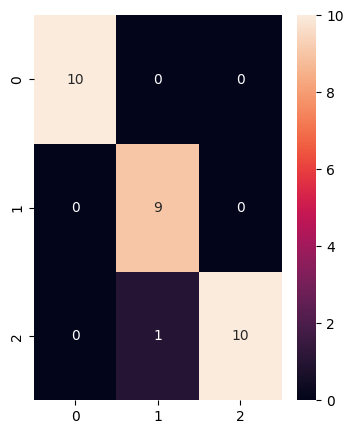

In [175]:
plt.figure(figsize=(4,5))
sns.heatmap(cm, annot=True)

In [176]:
from sklearn.model_selection import GridSearchCV

In [177]:
param = {
  "n_estimators" : [10, 50,200, 400, 500],
    "learning_rate" : [.01, .1, .5, 1]
}

In [186]:
Grid_CV = GridSearchCV(estimator=AdaBoostClassifier(), param_grid=param, cv = 5, n_jobs=-1)

In [187]:
grid_model = Grid_CV.fit(x_train, y_train)

In [188]:
grid_model.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

In [189]:
grid_model.score(x_train, y_train)

0.9916666666666667

In [190]:
grid_model.score(x_test, y_test)

1.0

In [191]:
y_pred_2 = grid_model.predict(x_test)

In [192]:
accuracy_score(y_test, y_pred_2)

1.0

In [194]:
print("Accuracy Score without hyparameter tuning : ", accuracy_score(y_test, y_pred))
print("Accuracy Score with hyparameter tuning : ", accuracy_score(y_test, y_pred_2))

Accuracy Score without hyparameter tuning :  0.9666666666666667
Accuracy Score with hyparameter tuning :  1.0
